¡A BARRIGA LLENA CORAZÓN CONTENTO!

ESTE ES MI PROYECTO DEL PRIMER SEMESTRE DE LAS ASIGNATURAS INTRODUCCIÓN A CIENCIA DE DATOS Y PROGRAMACIÓN
                               

En este proyecto tiene como objetivo por medio de datos contar una historia respondieron una serie de interrogantes sobre los restaurantes y bares de La Habana, Capital de Cuba

Importación de las bibliotecas de Python utilizadas en el proyecto  :

In [2]:

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from IPython.display import display
import warnings


Ocultación de los mensajes de error

In [3]:
warnings.filterwarnings("ignore", category=RuntimeWarning, message="Mean of empty slice")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in scalar divide")



Importación de los archivos .json :

In [4]:
p = "menu.json"
data = pd.read_json(p)

with open("municipios.json") as m:
    muni = json.load(m)

Con ayuda de la biblioteca de Pandas de Python le muestro  los restaurantes analizados, cuyos menus los conseguí por medio del canal de Telegram MenuCuba, menus de lugares que han visitado mis familiares, lugares que ido persolmente para obtener información y del grupo de Whatsapp del Grupo de Ciencia de Datos de la Matcom, donde estudio.

In [5]:

place= []
for pl in data:
    place.append(pl)

places = {
    "Restaurantes": place
}

df = pd.DataFrame(places)
pd.set_option('display.max_rows', None)
df

,Restaurantes
0,El Pellizcazo
1,La Ronda (Bar)
2,Los Nardos
3,La Fela
4,Mundo Pizza
5,DKmino
6,Teniente Rey 360
7,Pasos Habaneros
8,Cafe Fortuna Joe
9,La Mimosa


Para hacer un resultados más rápido cree una función de python con la ayuda de las bibiotecas Pandas y Numpy para el cálculo de las medias de los diferentes tipos de plato dentro de un municipio en específico de manera automática.

In [6]:


def dish(x: str,y: str):
   list = []
   for a in data:
      cart = data[a]["municipality"]
      if cart == x: 
         m = data[a]["menu"]
         for b in m:
            if b == y:
               n = data[a]["menu"][y]
               for c in n.values():
                  if type(c) == int or type(c) == float:
                     list.append(c)
                  else:
                     for d in c.values():
                        if type(d) == int or type(d) == float:
                           list.append(d)
                        else:
                           for e in d.values():
                              if type(e) == int or type(e) == float:
                                 list.append(e)
                              else:
                                 for f in e.values():
                                    if type(f) == int or type(f) == float:
                                       list.append(f)
                                    else:
                                       for g in f.values():
                                          list.append(g)     
                                       
                                                                           
   return list
def media(m: str, n: str):
    d = dish(m,n)
    median = np.nanmedian(d)
    return(median)



función para graficar

In [7]:

x = ['AN', 'BY', 'CH', 'CR', 'CT', 'DO', 'GB', 'HE', 'HV','LL','MR','PY','PR','RG','SM']
colors = ["r", "r", "g", "r", "r", "r", "r", "g", "g", "r", "r", "g", "g", "r", "r"]

def pyplot_bar(y: list, title: str):
    plt.figure(figsize=(10, 6))
    plt.bar(x, y, color=colors)
    plt.xlabel("MUNICIPIOS")
    plt.title(title)
    plt.show()


¡ Let´ GO !

¿ CÓMO SE COMPORTAN LOS PRECIOS DE UN TIPO DE PLATO POR LOS MUNICIPIOS DE LA HABANA ?

Seguro le ha surgido la duda, ¿ en que municipio es más caro un cierto tipo de plato ?, o ¿dónde es más barato? . Pero hay que estar al tanto de ciertos factores como el flujo de turistas en el municipio o la solvencia económica de sus habitantes, por lo que resulta necesario identificar con color verde las regiones que tienenen alto flujo de turistas y con color rojo las que tienen baja las visitas de extranjeros, lo que demuestra que mientras más turistas allá mayor serán los precios ya que son los que más condiciones económicas tienen para pasar un buen rato y comer comidas caras.

 Cuando una persona visita un restaurante lo primero que pide es un entrante para ir entreteniendo el estómago mientras preparan la comida que va llenar la barriga sin espacio para, por lo que construí la siguiente grafica paara comparar los precios de los entrantes por lo que es interesante saber alrededor de que precios se podría enfretar una persona al visitar un restaurante o un Bar. 
  Para ello hice la siguiente que lo muestra claramente que el municipio con los entrantes más caros tiene una alta tasa de turismos

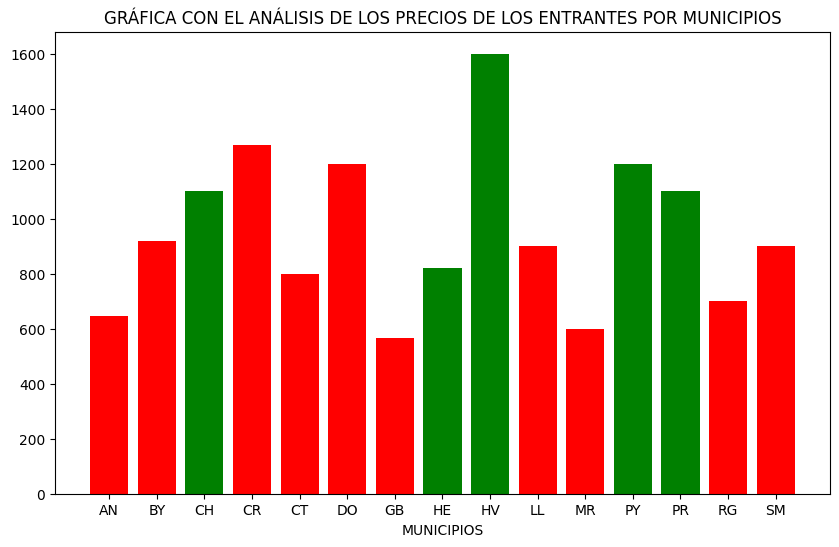

In [8]:
app = []
for ap in x:
    app.append(media(ap,"appetizers")) 
pyplot_bar(app,"GRÁFICA CON EL ANÁLISIS DE LOS PRECIOS DE LOS ENTRANTES POR MUNICIPIOS")

Después de difrutar de un sabroso entrante,  es necesario para llenarse el estómago es bueno consumir un plato fuerte, los cuaes pueden estar elaborados  por carnes de tierra, mariscos, risottos con un fuerte contenido alimenticio por lo que elabore la siguiente gráfica para hacer un análisis de los precios de los platos principales de los restaurantes de casa municipio, donde se puede apreciar que sigue prevaleciendo los altos precios en zonas con alta concentración de extranjeros, algo que  esperaba, pues se me hace imposible a mi y a mis padres comer en no de los lugares que encabezan la gráfca.

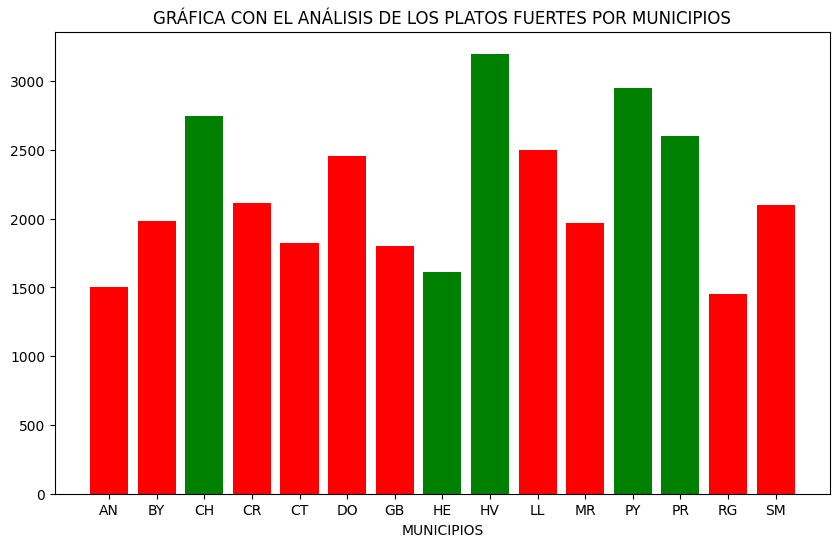

In [9]:
md = []
for pp in x:
    md.append(media(pp,"main_dishes"))
pyplot_bar(md, "GRÁFICA CON EL ANÁLISIS DE LOS PLATOS FUERTES POR MUNICIPIOS")

 Ahora como fanático  de la comida italiana les comparto una gráfica con la comparación de los precios de las pizzas. En la cual se puede apreciar que encabezan la lista municipios o los mal llamados "Monte", ya que ahí al haber una baja atracción turística, lo más rentable para ofertar a los cubanos son las pizzas, por lo que hay sitios que exceden los precios a costilla del hambre ajena

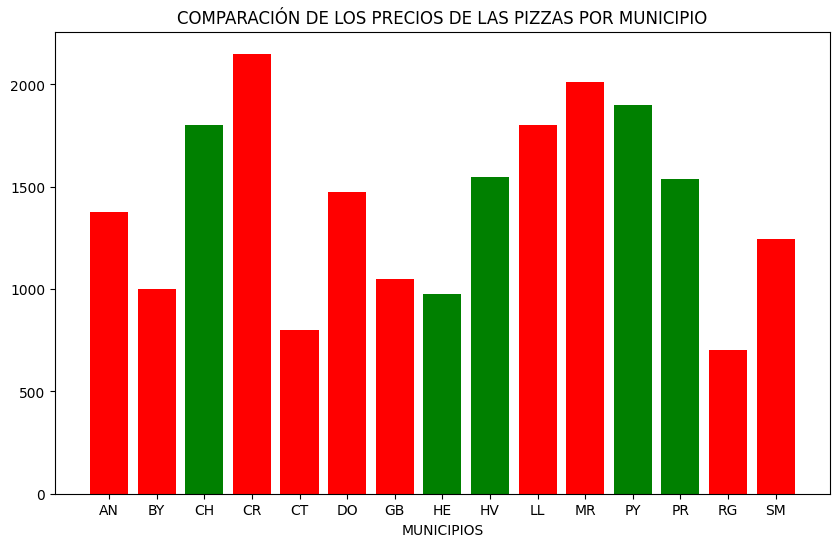

In [10]:
pz = []
for p in x:
    pz.append(media(p,"pizzas"))
pyplot_bar(pz, "COMPARACIÓN DE LOS PRECIOS DE LAS PIZZAS POR MUNICIPIO")

 Para bajar la comida no baja sólo con la fuerza de gravedad, no, nececesita, de una pequeña pero cara ayuda, que son los líquidos, que ayudan a la comida a bajar en el corto período de tiempo en que se permanece en un restaurante, por lo queles cooparto la comparativa por municipio

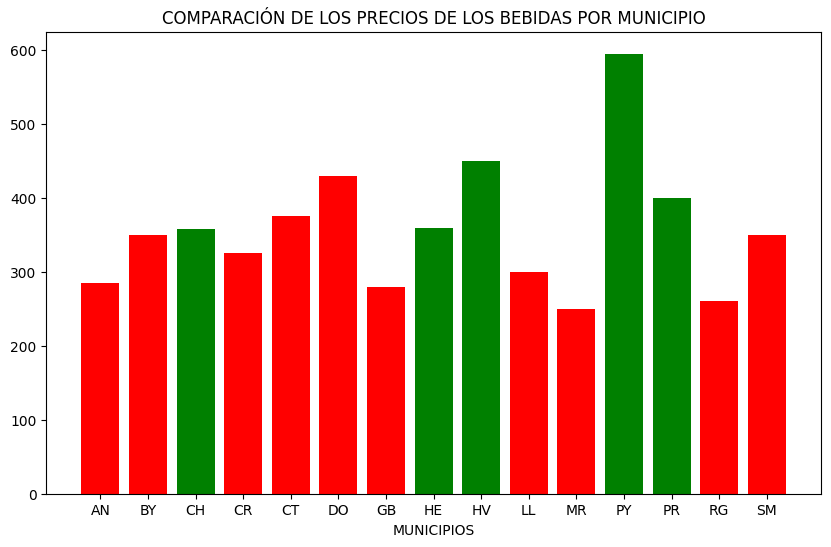

In [11]:
dk = []
for d in x:
    dk.append(media(d,"drinks"))
pyplot_bar(dk, "COMPARACIÓN DE LOS PRECIOS DE LOS BEBIDAS POR MUNICIPIO")

 ¿Ya estás lleno verdad?, pero no se ha terminado todavía, aún falta más.

 Al pasar un rato despues de llenarse la barriga, no hay nada mejor como disfrutar de un sabroso postre, por lo que ahora les comparto una comparativa de los lugares que maás económicos o más caro les saldría endulzarse el paladar.

Nota: En el análisis se incluyen dulcerías y haladerias como Sabor Cid, Helado Mío y la dulcería Dulces Monik, este último de San Miguel del Padrón.

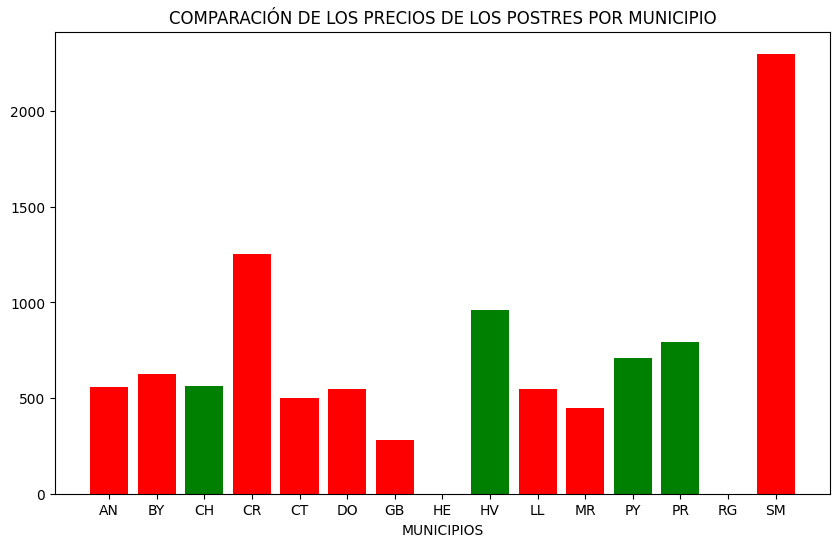

In [12]:
dss = []
for p in x:
    dss.append(media(p, "desserts"))
pyplot_bar(dss, "COMPARACIÓN DE LOS PRECIOS DE LOS POSTRES POR MUNICIPIO")

 Después de una comida, si son adultos, en caso de que lo oferte el local, pueden disfrutar de un cóctel o trago para pasar un rato agradable, pero siempre evitando el exceso porque el alchol es dañino para la salud. Por lo que al igual que los anteriores les comparto una gráfia comparativa de os precios según el municipio.

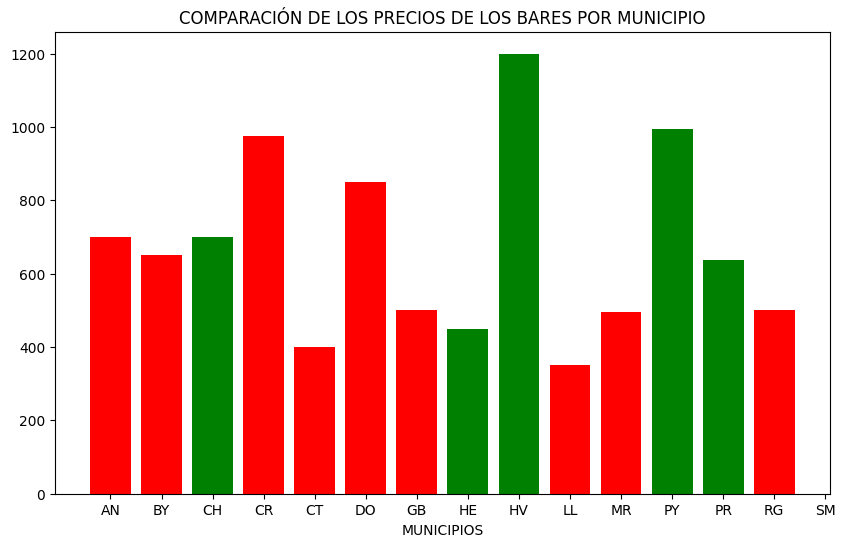

In [13]:
bar = []
for b in x:
    bar.append(media(b,"bar"))
pyplot_bar(bar, "COMPARACIÓN DE LOS PRECIOS DE LOS BARES POR MUNICIPIO")

 Como plus a la gráfica anterior .Por datos oficiales más del 60 % de los hombres consumen alcohol, por lo que como es una cantidad estremdamente alta en comparción con las mujeres, también les comparto la siguiete gráfica que compara la relación entre los precios medias de los bares y como referencia el 2% de la cantidad de habitantes del sexo masculino en el municipio,en la cual se puede apreciar que en los municipios con poca concentración de turístas, salvo algunas excepciones, mientras más hombres alla mayor seran los precios de las bebidas alcoholicas.

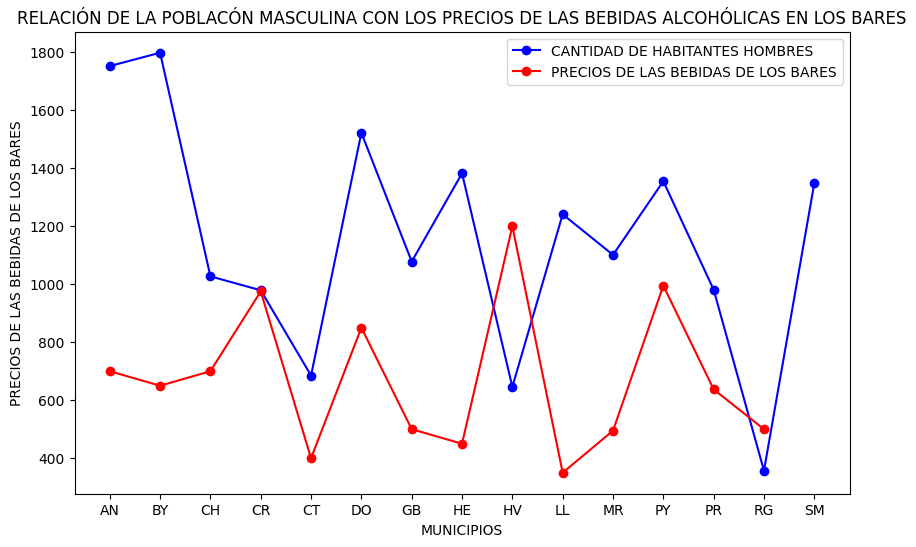

In [14]:

lmuni = []
pob = []
men = []
women = []
partmen = []
partwoman = []
for mn in muni.items():
    snd = mn[1]
    for sm in snd.values():
        lmuni.append(sm)
for n in range(6,65,4):
    for v in lmuni[n].values():
        pob.append(v)

for m in range(1,45,3):
    men.append(pob[m])
for part in men:
    part = part // 50
    partmen.append(part)

for w in range(2,45,3):
    women.append(pob[w])
for partw in women:
    parts = partw // 50
    partwoman.append(parts)

population = {
    "VALOR": x,
    "CANTIDAD DE HABITANTES HOMBRES": partmen,
    "PRECIOS DE LAS BEBIDAS DE LOS BARES": bar
}
df = pd.DataFrame(population)
plt.figure(figsize=(10, 6))
plt.plot(df["VALOR"], df["CANTIDAD DE HABITANTES HOMBRES"], label="CANTIDAD DE HABITANTES HOMBRES", color="blue", marker="o")
plt.plot(df["VALOR"], df["PRECIOS DE LAS BEBIDAS DE LOS BARES"], label="PRECIOS DE LAS BEBIDAS DE LOS BARES",color="red", marker="o")
plt.title("RELACIÓN DE LA POBLACÓN MASCULINA CON LOS PRECIOS DE LAS BEBIDAS ALCOHÓLICAS EN LOS BARES")
plt.xlabel("MUNICIPIOS")
plt.ylabel("PRECIOS DE LAS BEBIDAS DE LOS BARES")
plt.legend()
plt.show()

  Pero, como todo cubano para evadir el sueño y controlar la embriaguez necesita tomar café o una infusión caliente o fría,

  Por tanto les comparto una comparartiva de los precios de las infusiones por región.

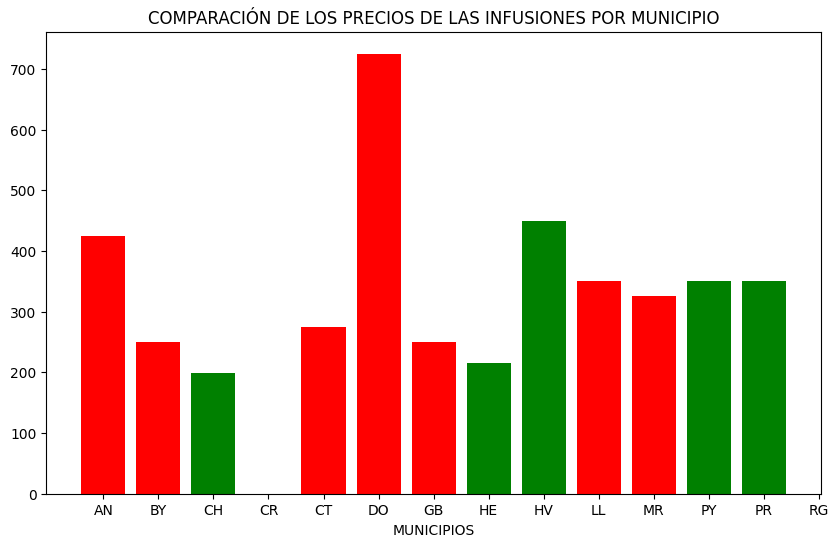

In [15]:
inf = []
for f in x:
    inf.append(media(f,"infusions"))
pyplot_bar(inf, "COMPARACIÓN DE LOS PRECIOS DE LAS INFUSIONES POR MUNICIPIO")

In [16]:

names = []

for n in data:
    names.append(n)

def price_int(index: int):
    bkf = "breafasts"
    lbkf = []
    ent = "appetizers"
    lent = []
    plp = "main_dishes"
    lplp = []
    ftt = "fittings"
    lftt = []
    pzz = "pizzas"
    lpzz = []
    agg = "aggregations"
    lagg = []
    crm = "creams"
    lcrm = []
    pst = "pastes"
    lpst = []
    sps = "soups"
    lsps = []
    brd = "breads"
    lbrd = []
    dsr = "desserts"
    ldsr = []
    drk = "drinks"
    ldrk = []
    bar = "bar"
    lbar = []
    ctn = "containers"
    lctn = []
    inf = "infusions"
    linf = []
    for i in names:
        if names.index(i) == index:
            menu = data[i]["menu"]
            for r in menu:
                if r == bkf:
                    values =  menu[r].values()
                    for bk in values:
                        if type(bk) == int or type(bk) == float:
                            lbkf.append(bk)
                        else:
                            for bf in bk.values():
                                lbkf.append(bf)

                if r == ent:
                    values =  menu[r].values()
                    for en in values:
                        if type(en) == int or type(en) == float:
                            lent.append(en)
                        else:
                            for snd in en.values():
                                lent.append(snd)
                if r == plp:
                    values =  menu[r].values()
                    for pl in values:
                        if type(pl) == int or type(pl) == float:
                            lplp.append(pl)
                        else:
                            for trd in pl.values():
                                if type(trd) == int or type(trd) == float:
                                    lplp.append(trd)
                                else:
                                    for ft in trd.values():
                                        lplp.append(ft)
                if r == ftt:
                    values =  menu[r].values()
                    for ft in values:
                        if type(ft) == int or type(ft) == float:
                            lftt.append(ft)
                        else:
                            for fv in ft.values():
                                if type(fv) == int or type(fv) == float:
                                    lftt.append(fv)
                                else:
                                    for fw in fv.values():
                                        lplp.append(fw)
                if r == pzz:
                    values =  menu[r].values()
                    for pz in values:
                        if type(pz) == int or type(pz) == float:
                            lpzz.append(pz)
                        else:
                            for pzs in pz.values():
                                if type(pzs) == int or type(pzs) == float:
                                    lpzz.append(pzs)
                                else:
                                    for pzzs in pzs.values():
                                        lpzz.append(pzzs)
                if r == agg:
                    values =  menu[r].values()
                    for ag in values:
                        if type(ag) == int or type(ag) == float:
                            lagg.append(ag)
                        else:
                            for gg in ag.values():
                                if type(gg) == int or type(gg) == float:
                                    lagg.append(gg)
                                else:
                                    for gs in gg.values():
                                        lagg.append(gs)
                if r == crm:
                    values =  menu[r].values()
                    for cr in values:
                        if type(cr) == int or type(cr) == float:
                            lcrm.append(cr)
                        else:
                            for crs in cr.values():
                                if type(crs) == int or type(crs) == float:
                                    lcrm.append(crs)
                                else:
                                    for cm in crs.values():
                                        lcrm.append(cm)
                if r == pst:
                    values =  menu[r].values()
                    for pst in values:
                        if type(pst) == int or type(pst) == float:
                            lpst.append(pst)
                        else:
                            for prs in pst.values():
                                if type(prs) == int or type(prs) == float:
                                    lpst.append(prs)
                                else:
                                    for pt in prs.values():
                                        lpst.append(pt)
                if r == sps:
                    values =  menu[r].values()
                    for sp in values:
                        if type(sp) == int or type(sp) == float:
                            lsps.append(sp)
                        else:
                            for ss in sp.values():
                                lsps.append(ss)
                if r == brd:
                    values =  menu[r].values()
                    for br in values:
                        if type(br) == int or type(br) == float:
                            lbrd.append(br)
                        else:
                            for bsd in br.values():
                                if type(bsd) == int or type(bsd) == float:
                                    lbrd.append(bsd)
                                else:
                                    for bd in bsd.values():
                                        lbrd.append(bd)
                if r == dsr:
                    values =  menu[r].values()
                    for ds in values:
                        if type(ds) == int or type(ds) == float:
                            ldsr.append(ds)
                        else:
                            for dr in ds.values():
                                if type(dr) == int or type(dr) == float:
                                    ldsr.append(dr)
                                else:
                                    for dsn in dr.values():
                                        ldsr.append(dsn)
                if r == drk:
                    values =  menu[r].values()
                    for dk in values:
                        if type(dk) == int or type(dk) == float:
                            ldrk.append(dk)
                        else:
                            for db in dk.values():
                                if type(db) == int or type(db) == float:
                                    ldrk.append(db)
                                else:
                                    for dbs in db.values():
                                        ldrk.append(dbs)
                if r == bar:
                    values =  menu[r].values()
                    for b in values:
                        if type(b) == int or type(b) == float:
                            lbar.append(b)
                        else:
                            for bnd in b.values():
                                if type(bnd) == int or type(bnd) == float:
                                    lbar.append(bnd)
                                else:
                                    for brd in bnd.values():
                                        if type(brd) == int or type(brd) == float:
                                            lbar.append(brd)
                                        else:
                                            for bft in brd.values():
                                                if type(bft) == int or type(bft) == float:
                                                    lbar.append(bft)
                                                else:
                                                    for fvt in bft.values():
                                                        lbar.append(fvt)
                if r == ctn:
                    values =  menu[r].values()
                    for ct in values:
                        if type(ct) == int or type(ct) == float:
                            lctn.append(ct)
                        else:
                            for cn in ct.values():
                                lctn.append(cn)
                if r == inf:
                    values =  menu[r].values()
                    for nf in values:
                        if type(nf) == int or type(nf) == float:
                            linf.append(nf)
                        else:
                            for f in nf.values():
                                linf.append(f)
                else:
                    continue
        else:
            continue    
    dishes = [lbkf, lent, lplp, lftt, lpzz, lagg, lcrm, lpst, lsps, lbrd, ldsr, ldrk, lbar, lctn, linf]
    median = []
    for r in dishes:
        median.append(np.nanmedian(r))
    return median
def price(index: int):
    budget = np.nansum(price_int(index))
    return int(budget)

In [17]:

salaries = muni["LH"]["salario_medio_en_2023"] 
salary = []

for s in names:
    index = names.index(s)
    bt = price(index)
    if bt <= salaries:
        salary.append(s)

porcent = (len(salary) / len(names) * 100)

def posibility(p: str):
    l = []
    for calc in salary:
        cc = data[calc]["municipality"]
        if cc == p:
            l.append(calc)
    return len(l)

pb = []
for pby in x:
    pb.append(posibility(pby))

In [18]:
print(" En base a un cálculo utilizando la bibioteca Numpy , métodos numéricos de python y tomando como referencia el salario media de Cuba en 2023 publicado en el anuario estadístico de 2024 pude llegar al resultado de que: ")
print(f"SÓLO UN {porcent} % DE LOS RESTAURANTES ANÁLIZADOS NO EXIGEN UN PRESUPUESTO MAYOR A AL SALARIO MEDIA DE CUBA.")

 En base a un cálculo utilizando la bibioteca Numpy , métodos numéricos de python y tomando como referencia el salario media de Cuba en 2023 publicado en el anuario estadístico de 2024 pude llegar al resultado de que: 
SÓLO UN 43.41085271317829 % DE LOS RESTAURANTES ANÁLIZADOS NO EXIGEN UN PRESUPUESTO MAYOR A AL SALARIO MEDIA DE CUBA.


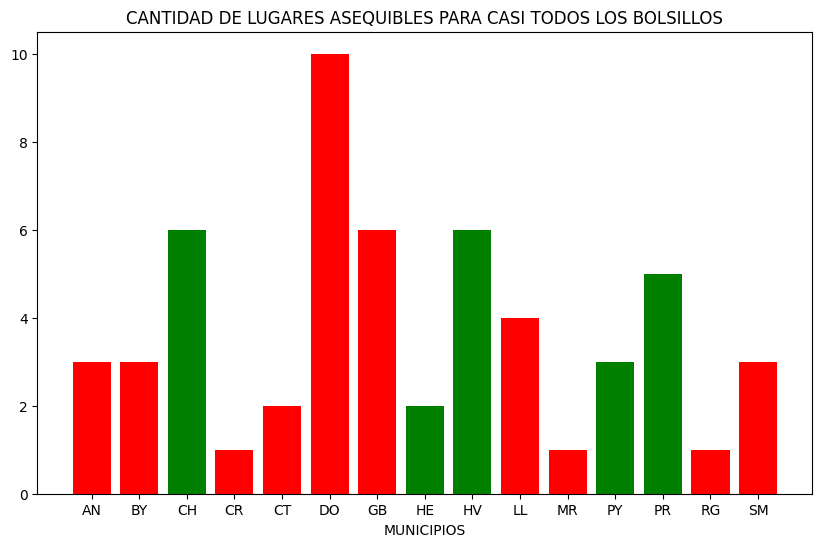

In [19]:
pyplot_bar(pb, "CANTIDAD DE LUGARES ASEQUIBLES PARA CASI TODOS LOS BOLSILLOS")

In [20]:

name = []
coordinates = []
lat = []
long = []

for cds in names:
    coordinate = data[cds]["coordinates"]
    if type(coordinate) == list and len(coordinate) == 2:
        coordinates.append(coordinate)
        name.append(cds)

for cc in coordinates:
    if len(cc) > 0:
        lat.append(cc[0])
        long.append(cc[1])
      
ubications = {
    "name": name,
    "latitud": lat,
    "longitud": long
}

ub = pd.DataFrame(ubications)

map = folium.Map(location=[23.1057291,-82.3581364], zoom_start=10)

for mp in ub.itertuples():
    folium.Marker(location=[mp.latitud, mp.longitud], popup= folium.Popup(mp.name, max_width=250)).add_to(map)

